## Labeling Connected Components

Import libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

Load and display image

In [3]:
def load_image(image_path, threshold=127):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return binary

def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


Implement dilation operation in this section


In [4]:
def dilation(binary_image, struct_elem):
##################################################
################### YOUR CODES ###################
    output = convolve2d(binary_image, struct_elem, mode='same', boundary='fill', fillvalue=0)
    dilated = (output > 0).astype(np.uint8)
    return dilated
##################################################



![connected _components_Extraction](./connected%20_components_Extraction.jpeg)


Based on the morphological relation shown in the image above, complete the function `morphological_connected_component` to identify and label connected components.

`labeled` is an array with the same size as the input image, where each pixel holds the label of the connected component it belongs to.


In [7]:
def morphological_connected_component(binary_image, structure=None):
##################################################
################### YOUR CODES ###################
    if structure is None:
        structure = np.ones((3, 3), dtype=np.uint8)

    binary = np.where(binary_image, 1, 0).astype(np.uint8)
    labeled = np.zeros(binary.shape, dtype=np.int32)
    label = 1

    while True:
        mask = np.logical_and(binary == 1, labeled == 0)
        coords = np.transpose(np.nonzero(mask))
        if coords.shape[0] == 0:
            break

        seed = np.zeros_like(binary, dtype=np.uint8)
        y, x = coords[0]
        seed[y, x] = 1

        prev = np.zeros_like(seed)
        while not np.all(seed == prev):
            prev = seed.copy()
            dilated = dilation(seed, structure)
            seed = np.bitwise_and(dilated, binary)

        labeled = labeled + (seed * label)
        label += 1

    return labeled
##################################################


In [8]:
def display_labeled_components(labeled_img):
    max_label = labeled_img.max()
    labeled_color = np.zeros((*labeled_img.shape, 3), dtype=np.uint8)

    for label in range(1, max_label + 1):
        mask = labeled_img == label
        color = np.random.randint(0, 255, size=3)
        labeled_color[mask] = color

    plt.imshow(labeled_color)
    plt.title("Labeled Components")
    plt.axis('off')
    plt.show()


### In the image "Connected_Components", there are 10 connected components. Complete the code below to label them using morphological operations.


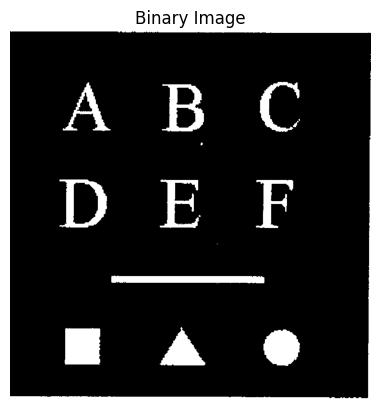

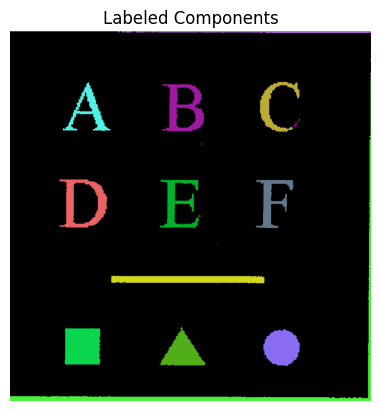

In [9]:
path = "Connected_Components.png"

binary_img = load_image(path)
show_image(binary_img, "Binary Image")

labeled = morphological_connected_component(binary_img)
display_labeled_components(labeled)


## Skeleton Extraction

Import libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


Load and display image

In [11]:
def load_and_binarize_image(image_path, threshold=127):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
    _, binary = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return (binary // 255).astype(np.uint8)

def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


Implement erosion operation in this section


In [12]:
def erosion(binary_image, struct_elem):
##################################################
    output = convolve2d(binary_image, struct_elem, mode='same', boundary='fill', fillvalue=0)
    eroded = (output == struct_elem.sum()).astype(np.uint8)
    return eroded
##################################################

Implement dilation operation in this section


In [13]:
def dilation(binary_image, struct_elem):
##################################################
################### YOUR CODES ###################

    output = convolve2d(binary_image, struct_elem, mode='same', boundary='fill', fillvalue=0)
    dilated = (output > 0).astype(np.uint8)
    return dilated
##################################################

Implement opening operation in this section


In [14]:
def opening(binary_image, struct_elem):
##################################################
    return dilation(erosion(binary_image, struct_elem), struct_elem)
##################################################

<img src="./skeletion_relation.jpeg" style="width:600px"/>


Based on the morphological operations illustrated in the image above, complete the function `morphological_skeleton` to compute the skeleton of a binary image using iterative morphological erosion and opening.

In [15]:
def morphological_skeleton(binary_image, struct_elem=None):
##################################################
    if struct_elem is None:
        struct_elem = np.array([[0,1,0],
                                [1,1,1],
                                [0,1,0]], dtype=np.uint8)

    binary = binary_image.copy()
    skeleton = np.zeros_like(binary)
    
    while np.any(binary):
        eroded = erosion(binary, struct_elem)
        opened = opening(eroded, struct_elem)
        skeleton_part = eroded - opened
        skeleton = skeleton | skeleton_part
        binary = eroded

    return skeleton
##################################################

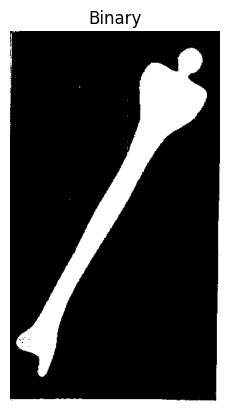

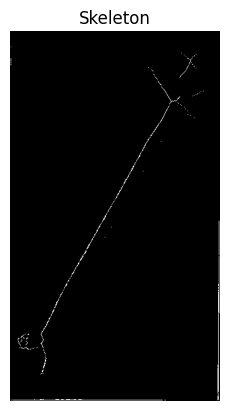

In [16]:
path = "skeleton.jpeg"
binary = load_and_binarize_image(path)
plt.imshow(binary, cmap='gray'); plt.title("Binary"); plt.axis('off'); plt.show()

skel = morphological_skeleton(binary)
plt.imshow(skel, cmap='gray'); plt.title("Skeleton"); plt.axis('off'); plt.show()